In [19]:
# Import necessary libraries
import pandas as pd                                      # Import Pandas library for data manipulation
import numpy as np                                       # Import NumPy library for numerical operations
import matplotlib.pyplot as plt                          # Import Matplotlib library for data visualization
from sklearn.model_selection import train_test_split     # Import train_test_split for splitting data
from sklearn.preprocessing import StandardScaler        # Import StandardScaler for feature scaling
from sklearn.ensemble import RandomForestClassifier      # Import RandomForestClassifier for classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score   # Import evaluation metrics
from sklearn import metrics                              # Import additional metrics
import seaborn as sns                                    # Import Seaborn for statistical data visualization


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [21]:
# Load the dataset
train = pd.read_csv('/content/drive/MyDrive/HeartBeat/mitbih_train.csv/mitbih_train.csv')   # Read training data
test = pd.read_csv('/content/drive/MyDrive/HeartBeat/mitbih_test.csv/mitbih_test.csv')      # Read testing data
# Display the first few rows of the dataset
print(train.head())

# Check for missing values
print(train.isnull().sum())


   9.779411554336547852e-01  9.264705777168273926e-01  \
0                  0.960114                  0.863248   
1                  1.000000                  0.659459   
2                  0.925414                  0.665746   
3                  0.967136                  1.000000   
4                  0.927461                  1.000000   

   6.813725233078002930e-01  2.450980395078659058e-01  \
0                  0.461538                  0.196581   
1                  0.186486                  0.070270   
2                  0.541436                  0.276243   
3                  0.830986                  0.586854   
4                  0.626943                  0.193437   

   1.544117629528045654e-01  1.911764740943908691e-01  \
0                  0.094017                  0.125356   
1                  0.070270                  0.059459   
2                  0.196133                  0.077348   
3                  0.356808                  0.248826   
4                  0.094991  

In [22]:
test.describe()                             # Display statistical information about the testing data


,1.000000000000000000e+00,7.582644820213317871e-01,1.115702465176582336e-01,0.000000000000000000e+00,8.057851344347000122e-02,7.851240038871765137e-02,6.611569970846176147e-02,4.958677664399147034e-02,4.752065986394882202e-02,3.512396663427352905e-02,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
count,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,...,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000
mean,0.894405,0.761902,0.426641,0.221606,0.201682,0.209897,0.204811,0.200999,0.197640,0.196030,...,0.004588,0.004328,0.004020,0.003789,0.003639,0.003459,0.003167,0.003000,0.002946,0.473711
std,0.234564,0.218664,0.228568,0.208710,0.177730,0.172195,0.177948,0.176143,0.170229,0.166707,...,0.043129,0.042188,0.040256,0.039398,0.038536,0.037718,0.035904,0.035523,0.035267,1.143469
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.924254,0.683355,0.251220,0.050514,0.082873,0.087912,0.072678,0.066003,0.064516,0.068506,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.990431,0.828996,0.432781,0.167641,0.147651,0.158120,0.144068,0.144509,0.150442,0.149038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.912320,0.583994,0.347097,0.259227,0.287356,0.298456,0.294566,0.289907,0.282966,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.991429,...,0.980392,1.000000,0.966102,1.000000,1.000000,1.000000,1.000000,0.996053,1.000000,4.000000


In [23]:
train.describe()                     # Display statistical information about the training data

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
count,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,...,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000
mean,0.890359,0.758158,0.423969,0.219104,0.201127,0.210399,0.205809,0.201774,0.198693,0.196758,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473382
std,0.240910,0.221814,0.227305,0.206880,0.177058,0.171910,0.178482,0.177241,0.171778,0.168358,...,0.044155,0.042089,0.040525,0.038651,0.037193,0.036255,0.034790,0.032865,0.031924,1.143190
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682482,0.250965,0.048458,0.082329,0.088415,0.073333,0.066116,0.065000,0.068643,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826007,0.429467,0.165992,0.147870,0.158798,0.145320,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287634,0.298246,0.295393,0.290837,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [24]:
train = train.dropna()                                    # Remove rows with missing values in the training data
train.isnull().sum()                                      # Check again for missing values in the training data


9.779411554336547852e-01       0
9.264705777168273926e-01       0
6.813725233078002930e-01       0
2.450980395078659058e-01       0
1.544117629528045654e-01       0
                              ..
0.000000000000000000e+00.84    0
0.000000000000000000e+00.85    0
0.000000000000000000e+00.86    0
0.000000000000000000e+00.87    0
0.000000000000000000e+00.88    0
Length: 188, dtype: int64

In [25]:
test = test.dropna()                                      # Remove rows with missing values in the testing data
test.isnull().sum()                                       # Check again for missing values in the testing data


1.000000000000000000e+00       0
7.582644820213317871e-01       0
1.115702465176582336e-01       0
0.000000000000000000e+00       0
8.057851344347000122e-02       0
                              ..
0.000000000000000000e+00.61    0
0.000000000000000000e+00.62    0
0.000000000000000000e+00.63    0
0.000000000000000000e+00.64    0
0.000000000000000000e+00.65    0
Length: 188, dtype: int64

In [26]:
X_train = train.iloc[:, :-1]  # Select all columns except the last one
y_train = train.iloc[:, -1]   # Select the last column as the target variable



In [27]:
X_test = test.iloc[:, :-1]                                # Select all columns except the last one as features
y_test = test.iloc[:, -1]                                  # Select the last column as the target variable


In [28]:
model = RandomForestClassifier(n_estimators=100, random_state=42)   # Create a RandomForestClassifier
model.fit(X_train, y_train)                               # Fit the model on the training data


RandomForestClassifier(random_state=42)

In [29]:
model = RandomForestClassifier(n_estimators=100, random_state=42)   # Create a RandomForestClassifier
model.fit(X_test, y_test)                                           # Fit the model on the training data


RandomForestClassifier(random_state=42)

In [30]:
y_pred = model.predict(X_test)                # Make predictions using the test data

In [31]:
print("Test accuracy:", metrics.accuracy_score(y_test, y_pred))                                # Print test accuracy
print("Test precision (micro):", metrics.precision_score(y_test, y_pred, average='micro'))     # Print test precision (micro)
print("Test confusion matrix\n", metrics.confusion_matrix(y_test, y_pred))                     # Print confusion matrix for the test data
print("Test Recall score\n", metrics.recall_score(y_test, y_pred, average='micro'))            # Print Recall score for the test data

Test accuracy: 1.0
Test precision (micro): 1.0
Test confusion matrix
 [[18117     0     0     0     0]
 [    0   556     0     0     0]
 [    0     0  1448     0     0]
 [    0     0     0   162     0]
 [    0     0     0     0  1608]]
Test Recall score
 1.0


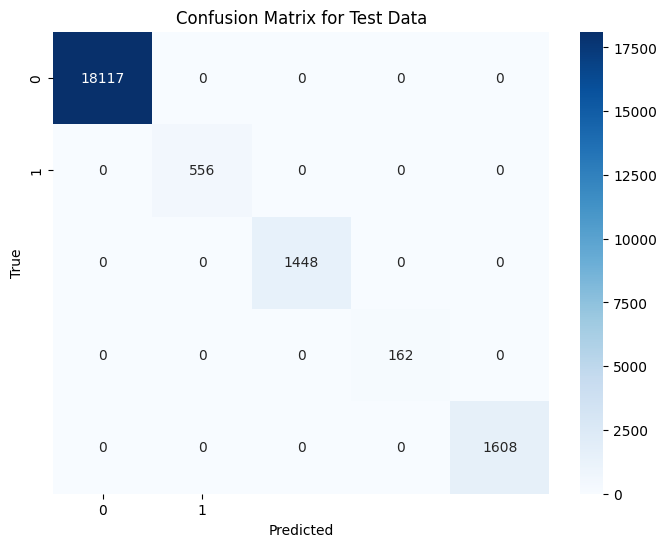

In [32]:
# Plot the confusion matrix for better visualization
conf_mat = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Test Data')
plt.show()

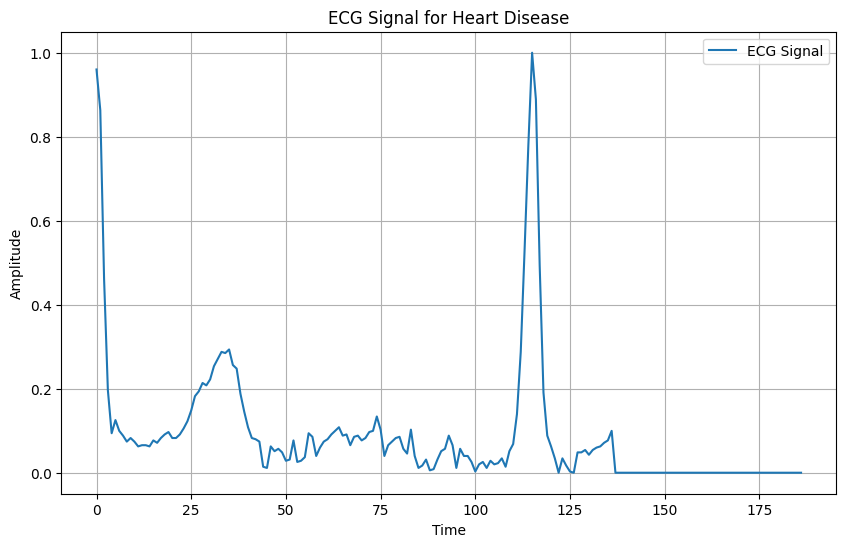

In [33]:
# Plot the ECG signal for the first sample in the training set
ecg_data = X_train.iloc[0, :].values

time = np.arange(len(ecg_data))

plt.figure(figsize=(10, 6))
plt.plot(time, ecg_data, label='ECG Signal')
plt.title('ECG Signal for Heart Disease')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

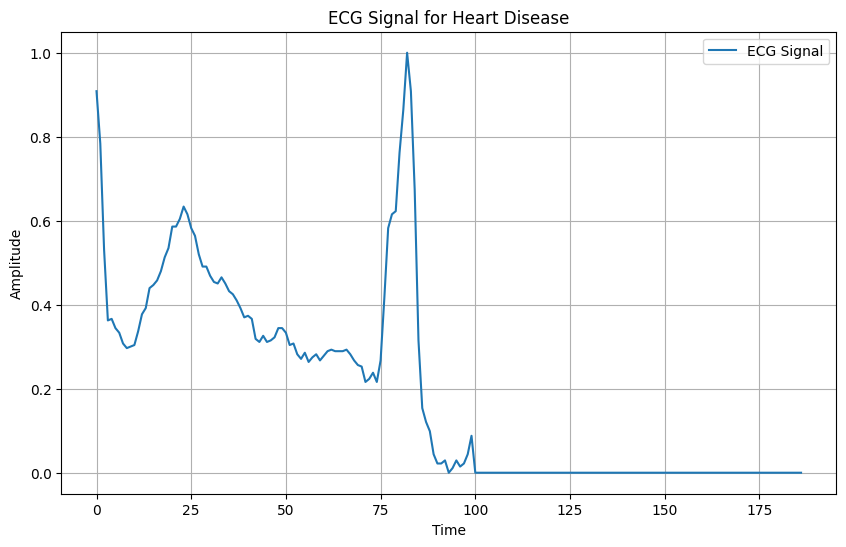

In [34]:
# Plot the ECG signal for the first sample in the testing set
ecg_data = X_test.iloc[0, :].values

time = np.arange(len(ecg_data))

plt.figure(figsize=(10, 6))
plt.plot(time, ecg_data, label='ECG Signal')
plt.title('ECG Signal for Heart Disease')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()